# STAT3612 Lecture 10 - Neural Networks
[Dr. Aijun Zhang](http://www.statsoft.org) & [Mr. Hengtao Zhang](zhanght@connetc.hku.hk) - [STAT3612 Statistical Machine Learning](http://www.statsoft.org/teaching/stat3612/)

15 November 2019

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import matplotlib.colors as col
def plot_decision_boundary(x, y, model, title):
    h = 0.02
    x_min, x_max = x[:, 0].min()-0.1, x[:, 0].max() +0.1
    y_min, y_max = x[:, 1].min()-0.1, x[:, 1].max() +0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Obtain labels for each point in mesh. Use last trained model.
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    cmap_light = col.ListedColormap(['#AAFFAA','#AAAAFF','#FFAAAA'])
    cmap_bold = col.ListedColormap(['#00FF00','#0000FF','#FF0000'])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.clf()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    plt.scatter(x[:, 0], x[:, 1], c=y, 
                    edgecolor='k',cmap=cmap_bold)
    
    plt.title(title, fontsize = 20)

## MLP in `sklearn`

In [3]:
mixture_data = pd.read_table('./mixture.txt',sep=',',index_col=0)
x_mix,y_mix=mixture_data.iloc[:,:2].values,mixture_data['y'].values

In [4]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

###  Example 1: Mixture Data

Prediction Accuracy: 0.79


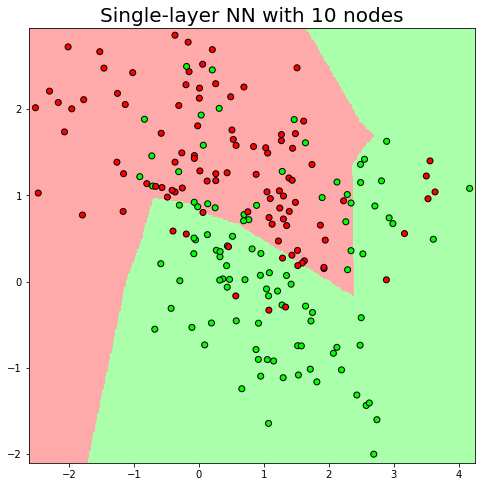

In [5]:
clf = MLPClassifier(hidden_layer_sizes = [10], activation='relu', solver='adam', 
                    learning_rate_init = 0.01, max_iter = 1000, random_state=2019)
clf.fit(x_mix, y_mix)
print("Prediction Accuracy:", accuracy_score(y_mix, clf.predict(x_mix)))
plt.figure(1, figsize=(8, 8))
plot_decision_boundary(x_mix, y_mix, clf, title = "Single-layer NN with 10 nodes")

Prediction Accuracy: 0.85


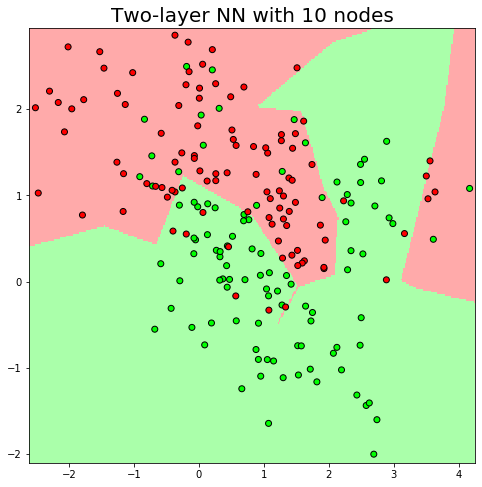

In [6]:
clf = MLPClassifier(hidden_layer_sizes = [5,5], activation='relu', solver='adam', 
                    learning_rate_init = 0.01, max_iter = 1000, random_state=2019)
clf.fit(x_mix, y_mix)
print("Prediction Accuracy:", accuracy_score(y_mix, clf.predict(x_mix)))
plt.figure(1, figsize=(8, 8))
plot_decision_boundary(x_mix, y_mix, clf, title = "Two-layer NN with 10 nodes")

### Example 2: Moon Data

In [7]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

x, y = make_moons(n_samples=10000, noise=0.2)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state=2019)

Testing Accuracy: 0.8805


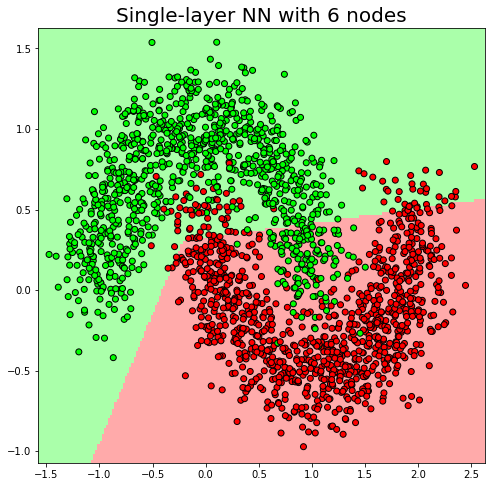

In [8]:
clf = MLPClassifier(hidden_layer_sizes = [6], activation='relu', solver='adam', 
                    learning_rate_init = 0.01, max_iter = 1000, verbose = False, random_state=2019)
clf.fit(x_train, y_train)
print("Testing Accuracy:", accuracy_score(y_test, clf.predict(x_test)))
plt.figure(1, figsize=(8, 8))
plot_decision_boundary(x_test, y_test, clf, title = "Single-layer NN with 6 nodes")

Testing Accuracy: 0.9685


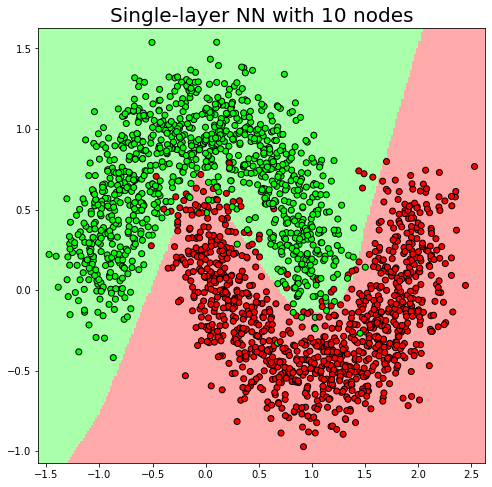

In [9]:
clf = MLPClassifier(hidden_layer_sizes = [10], activation='relu', solver='adam', 
                    learning_rate_init = 0.01, max_iter = 1000, verbose = False, random_state=2019)
clf.fit(x_train, y_train)
print("Testing Accuracy:", accuracy_score(y_test, clf.predict(x_test)))
plt.figure(1, figsize=(8, 8))
plot_decision_boundary(x_test, y_test, clf, title = "Single-layer NN with 10 nodes")

Testing Accuracy: 0.967


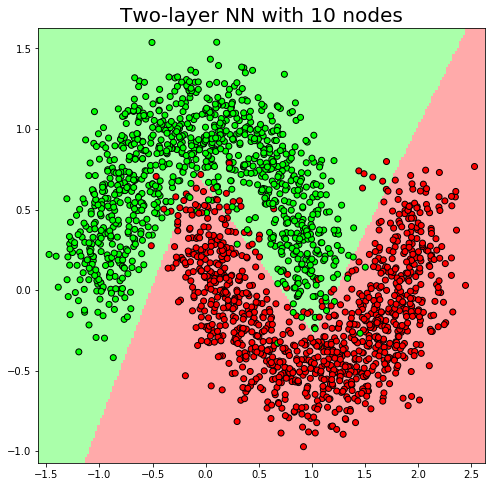

In [10]:
clf = MLPClassifier(hidden_layer_sizes = [3, 3], activation='relu', solver='adam', 
                    learning_rate_init = 0.01, max_iter = 1000, verbose = False, random_state=2019)
clf.fit(x_train, y_train)
print("Testing Accuracy:", accuracy_score(y_test, clf.predict(x_test)))
plt.figure(1, figsize=(8, 8))
plot_decision_boundary(x_test, y_test, clf, title = "Two-layer NN with 10 nodes")

## Keras in `tensorflow`

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf
np.random.seed(2019)
tf.random.set_seed(2019)

In [12]:
# sequentially define the model
model = Sequential()
# first hidden layer with 10 nodes
model.add(Dense(10, activation='relu', input_dim=2))
# second hidden layer with 10 nodes
model.add(Dense(10, activation='relu'))
# output layer
model.add(Dense(1, activation='sigmoid'))

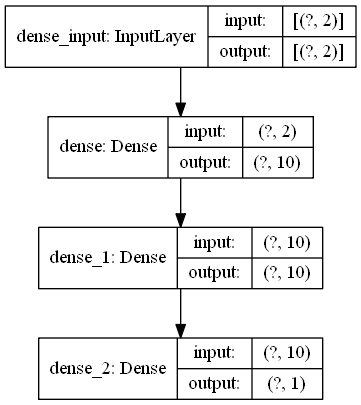

In [13]:
# visualize the model
from tensorflow.keras.utils import plot_model
plot_model(model,show_shapes=True, show_layer_names=True)

In [14]:
# compile the model with Adam optimizer
from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(lr=0.05),
              loss='binary_crossentropy',
              metrics=["accuracy"])

In [15]:
# train the model on the moon data with given epochs and batch size
history = model.fit(x_train, y_train, validation_data=[x_test,y_test],
                    epochs=20, batch_size=256)
score = model.evaluate(x_test, y_test, verbose=0)
print('Testing accuracy: %0.4f'%score[1])

Train on 8000 samples, validate on 2000 samples
Epoch 1/20
8000/8000 [==============================] - 1s 124us/sample - loss: 0.3088 - accuracy: 0.8605 - val_loss: 0.2248 - val_accuracy: 0.8985
Epoch 2/20
8000/8000 [==============================] - 0s 9us/sample - loss: 0.1657 - accuracy: 0.9339 - val_loss: 0.1022 - val_accuracy: 0.9635
Epoch 3/20
8000/8000 [==============================] - 0s 10us/sample - loss: 0.0919 - accuracy: 0.9661 - val_loss: 0.0825 - val_accuracy: 0.9725
Epoch 4/20
8000/8000 [==============================] - 0s 11us/sample - loss: 0.0865 - accuracy: 0.9703 - val_loss: 0.0819 - val_accuracy: 0.9690
Epoch 5/20
8000/8000 [==============================] - 0s 8us/sample - loss: 0.0886 - accuracy: 0.9685 - val_loss: 0.0780 - val_accuracy: 0.9740
Epoch 6/20
8000/8000 [==============================] - 0s 14us/sample - loss: 0.0864 - accuracy: 0.9688 - val_loss: 0.0791 - val_accuracy: 0.9715
Epoch 7/20
8000/8000 [==============================] - 0s 20us/sample 

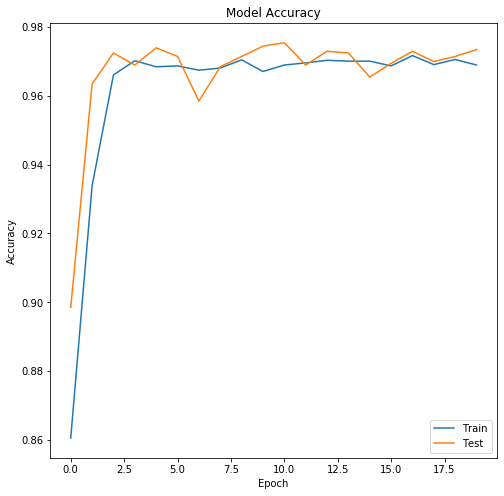

In [16]:
# plot training & testing accuracy values
plt.figure(figsize=(8,8))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])
plt.show()

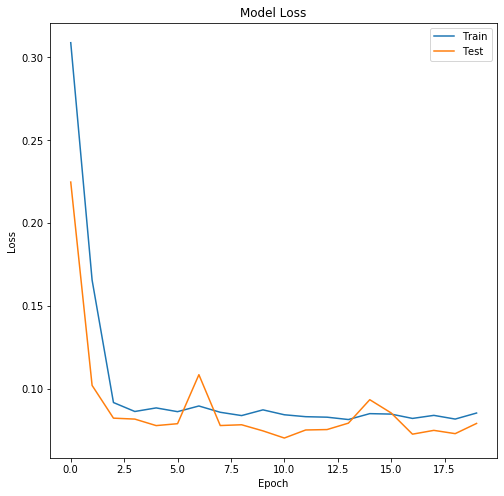

In [17]:
# plot training & testing loss values
plt.figure(figsize=(8,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])
plt.show()